In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


## Keras
https://keras.io/

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU.
Read the documentation at Keras.io.

Keras is compatible with: Python 2.7-3.6.

#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras
#https://elitedatascience.com/keras-tutorial-deep-learning-in-python

https://gist.github.com/kmclaugh/0a377ee8a8126fdfde4e6b7d237bfb4f
https://www.tensorflow.org/tutorials/keras/basic_regression

Fit a simple function like the square root

  $$y = \sqrt(x)$$
  
using a single input.

In [2]:
# generate a set of scalar input and scalar output values
#
x = np.linspace(0.0, 9.0, 99)
y = np.sqrt(x)

In [3]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear')) #sigmoid'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [4]:
model.fit(x,y, epochs=150, batch_size=10)

Epoch 1/150
99/99 [==============================] - 0s 4ms/step - loss: 4.2991
Epoch 2/150
99/99 [==============================] - 0s 141us/step - loss: 3.0679
Epoch 3/150
99/99 [==============================] - 0s 212us/step - loss: 2.3728
Epoch 4/150
99/99 [==============================] - 0s 191us/step - loss: 1.7101
Epoch 5/150
99/99 [==============================] - 0s 201us/step - loss: 1.1197
Epoch 6/150
99/99 [==============================] - 0s 181us/step - loss: 0.6575
Epoch 7/150
99/99 [==============================] - 0s 161us/step - loss: 0.3465
Epoch 8/150
99/99 [==============================] - 0s 181us/step - loss: 0.1754
Epoch 9/150
99/99 [==============================] - 0s 191us/step - loss: 0.1141
Epoch 10/150
99/99 [==============================] - 0s 212us/step - loss: 0.1010
Epoch 11/150
99/99 [==============================] - 0s 181us/step - loss: 0.1015
Epoch 12/150
99/99 [==============================] - 0s 201us/step - loss: 0.0987
Epoch 13/150
99

99/99 [==============================] - 0s 151us/step - loss: 0.0106
Epoch 100/150
99/99 [==============================] - 0s 171us/step - loss: 0.0103
Epoch 101/150
99/99 [==============================] - 0s 141us/step - loss: 0.0099
Epoch 102/150
99/99 [==============================] - ETA: 0s - loss: 0.011 - 0s 151us/step - loss: 0.0095
Epoch 103/150
99/99 [==============================] - 0s 161us/step - loss: 0.0092
Epoch 104/150
99/99 [==============================] - 0s 201us/step - loss: 0.0089
Epoch 105/150
99/99 [==============================] - 0s 171us/step - loss: 0.0086
Epoch 106/150
99/99 [==============================] - 0s 212us/step - loss: 0.0083
Epoch 107/150
99/99 [==============================] - 0s 212us/step - loss: 0.0080
Epoch 108/150
99/99 [==============================] - 0s 181us/step - loss: 0.0077
Epoch 109/150
99/99 [==============================] - 0s 252us/step - loss: 0.0074
Epoch 110/150
99/99 [==============================] - 0s 191us/st

The result looks like a piece-wise linear fit with three segments.

It might be interesting to try adding more hidden layers to see if that adds more segments.

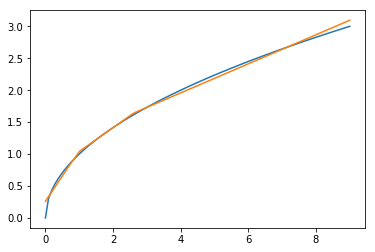

In [5]:
yp = model.predict(x).reshape(-1)
plt.plot(x, np.sqrt(x))
plt.plot(x, yp)

Try representing each input value as a bit array and try to fit integer square roots.

In [6]:
# convert integers into arrays of bits
#
bitval = lambda x :[int(c) for c in '0000000'+bin(x)[2:]][-8:]
bin(2), bitval(2)

('0b10', [0, 0, 0, 0, 0, 0, 1, 0])

In [7]:
x = np.arange(256)
xx = np.array([bitval(b) for b in x])
y = np.sqrt( x ).astype(np.int)
yy = np.array([bitval(b) for b in y])[:,-4:]
yy.shape, yy[100:205:16,:]

((256, 4), array([[1, 0, 1, 0],
        [1, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 0, 0],
        [1, 1, 0, 1],
        [1, 1, 1, 0]]))

In [8]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam')

model.fit(xx, y, epochs=150, batch_size=10)

Epoch 1/150
256/256 [==============================] - 0s 2ms/step - loss: 113.2789
Epoch 2/150
256/256 [==============================] - 0s 171us/step - loss: 107.3307
Epoch 3/150
256/256 [==============================] - 0s 183us/step - loss: 96.9416
Epoch 4/150
256/256 [==============================] - 0s 222us/step - loss: 79.4513
Epoch 5/150
256/256 [==============================] - 0s 117us/step - loss: 55.8330
Epoch 6/150
256/256 [==============================] - 0s 133us/step - loss: 30.0859
Epoch 7/150
256/256 [==============================] - 0s 140us/step - loss: 12.9835
Epoch 8/150
256/256 [==============================] - 0s 140us/step - loss: 8.4171
Epoch 9/150
256/256 [==============================] - 0s 140us/step - loss: 7.4832
Epoch 10/150
256/256 [==============================] - 0s 110us/step - loss: 6.7433
Epoch 11/150
256/256 [==============================] - 0s 144us/step - loss: 6.1118
Epoch 12/150
256/256 [==============================] - 0s 142us/st

256/256 [==============================] - 0s 109us/step - loss: 0.1179
Epoch 98/150
256/256 [==============================] - 0s 113us/step - loss: 0.1140
Epoch 99/150
256/256 [==============================] - 0s 113us/step - loss: 0.1124
Epoch 100/150
256/256 [==============================] - 0s 113us/step - loss: 0.1099
Epoch 101/150
256/256 [==============================] - 0s 113us/step - loss: 0.1122
Epoch 102/150
256/256 [==============================] - 0s 113us/step - loss: 0.1098
Epoch 103/150
256/256 [==============================] - 0s 121us/step - loss: 0.1064
Epoch 104/150
256/256 [==============================] - 0s 144us/step - loss: 0.1063
Epoch 105/150
256/256 [==============================] - 0s 109us/step - loss: 0.1055
Epoch 106/150
256/256 [==============================] - 0s 113us/step - loss: 0.1031
Epoch 107/150
256/256 [==============================] - 0s 113us/step - loss: 0.1033
Epoch 108/150
256/256 [==============================] - 0s 113us/step

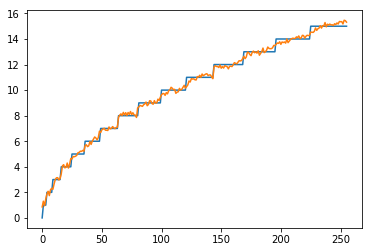

In [9]:
yp = model.predict(xx).reshape(-1)
yp[0:12]
plt.plot(x, y)
plt.plot(x, yp)
#plt.plot(x, yp.astype(np.int) )

Try 8-bits of input a 4-bits of output.

In [10]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

# Compile model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam')

model.fit(xx, yy, epochs=150, batch_size=10)

Epoch 1/150
256/256 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 2/150
256/256 [==============================] - 0s 140us/step - loss: 0.2445
Epoch 3/150
256/256 [==============================] - 0s 125us/step - loss: 0.2374
Epoch 4/150
256/256 [==============================] - 0s 136us/step - loss: 0.2291
Epoch 5/150
256/256 [==============================] - 0s 160us/step - loss: 0.2211
Epoch 6/150
256/256 [==============================] - 0s 157us/step - loss: 0.2140
Epoch 7/150
256/256 [==============================] - 0s 132us/step - loss: 0.2068
Epoch 8/150
256/256 [==============================] - 0s 144us/step - loss: 0.1997
Epoch 9/150
256/256 [==============================] - 0s 136us/step - loss: 0.1925
Epoch 10/150
256/256 [==============================] - 0s 129us/step - loss: 0.1865
Epoch 11/150
256/256 [==============================] - 0s 140us/step - loss: 0.1808
Epoch 12/150
256/256 [==============================] - 0s 140us/step - loss

256/256 [==============================] - 0s 140us/step - loss: 0.0405
Epoch 98/150
256/256 [==============================] - 0s 199us/step - loss: 0.0398
Epoch 99/150
256/256 [==============================] - 0s 156us/step - loss: 0.0394
Epoch 100/150
256/256 [==============================] - 0s 183us/step - loss: 0.0392
Epoch 101/150
256/256 [==============================] - 0s 183us/step - loss: 0.0385
Epoch 102/150
256/256 [==============================] - 0s 175us/step - loss: 0.0379
Epoch 103/150
256/256 [==============================] - 0s 206us/step - loss: 0.0375
Epoch 104/150
256/256 [==============================] - 0s 140us/step - loss: 0.0371
Epoch 105/150
256/256 [==============================] - 0s 129us/step - loss: 0.0367
Epoch 106/150
256/256 [==============================] - 0s 113us/step - loss: 0.0363
Epoch 107/150
256/256 [==============================] - 0s 125us/step - loss: 0.0358
Epoch 108/150
256/256 [==============================] - 0s 136us/step

In [11]:
yp = model.predict(xx)
yp.shape
#print(yy[50:62,:], yp[5:62,:])
#plt.plot(x, y)
#plt.plot(x, yp)
#yy.shape

(256, 4)

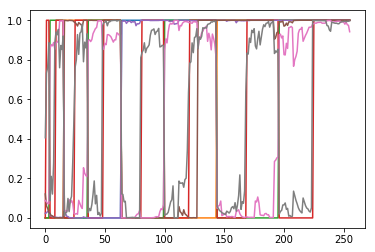

In [12]:
plt.plot(yy)
plt.plot(yp)

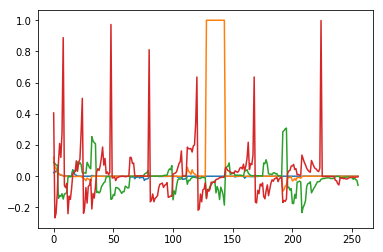

In [13]:
plt.plot(yp -yy)

### Next steps?
#### Hyperparameter optimization
#### sqrt applied to binary representation of float (unlikely to work)